## Stage 2. 탐색적 데이터 분석(EDA)

### 목표

데이터 탐색을 통한 데이터 분석 방향 설정

### 1. 데이터 분석 전 준비

In [3]:
import pandas as pd

train = pd.read_csv('../data/train.csv', encoding = 'utf-8')
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


### 2. 타겟 데이터 살펴보기

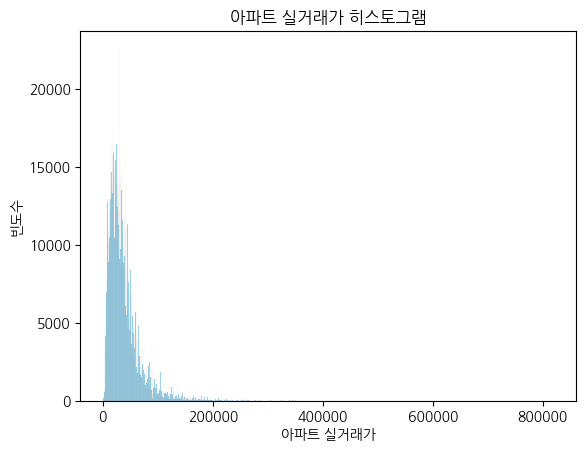

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 나머지 코드
def str_to_int(string):
    if type(string) == str:
        string = string.replace(',', '')
        return int(string)
    else:
        return string

train['transaction_real_price'] = train['transaction_real_price'].apply(str_to_int)
data = train['transaction_real_price']

# Seaborn을 사용하여 히스토그램 그리기
sns.histplot(data, color='skyblue')

# 그래프에 제목과 축 레이블 추가
plt.title('아파트 실거래가 히스토그램')
plt.xlabel('아파트 실거래가')
plt.ylabel('빈도수')

# 그래프 표시
plt.show()


[결과 해석]

- 아파트 실거래가는 왼쪽으로 쏠려있는 분포를 그리고 있음.
- 오른쪽으로 길게 분포하고 있음을 확인함.
- 집값이 높은 아파트를 얼마나 정확하게 예측 하느냐가 모델 학습에 있어 가장 어려운 부분이라고 생각할 수 있음.

### 3. city 컬럼 탐색

In [9]:
train['city'].value_counts()

city
서울특별시    742285
부산광역시    474268
Name: count, dtype: int64

### 4. dong 컬럼 탐색

In [10]:
train['dong'].value_counts()

dong
상계동    29346
좌동     23255
화명동    21511
용호동    17398
중계동    17079
       ...  
주성동        2
누상동        2
옥인동        1
구수동        1
효제동        1
Name: count, Length: 473, dtype: int64

### 5. jibun 컬럼 탐색

In [11]:
train['jibun'].value_counts()

jibun
176-30    6594
17        3709
944       3615
53        3566
479       3435
          ... 
793-36       1
797-43       1
718-10       1
792-10       1
94-8         1
Name: count, Length: 8961, dtype: int64

### 6. apt 컬럼 탐색 (1)

In [13]:
print('아파트 종류 총 개수', len(train['apt'].unique()))
display(train['apt'].value_counts()[:50])

아파트 종류 총 개수 10440


apt
현대            13154
한신             9766
삼성             6729
대우             6216
신동아            5851
두산             5801
주공2            5669
삼성래미안          5483
우성             5411
벽산             4651
동원로얄듀크         4430
경남             4028
삼환             3896
쌍용             3409
롯데캐슬           3381
삼익             3362
대림             3238
오륙도에스케이뷰       3220
코오롱            3174
파크리오           3094
몰운대            2886
극동             2884
청구             2828
현대3            2595
삼정그린코아         2585
대림e-편한세상       2583
에스케이북한산시티      2572
다대동롯데캐슬몰운대     2536
성원             2525
동아             2486
주공5            2479
미성             2448
엘지메트로시티1       2359
현대1            2358
개포주공 1단지       2356
삼익비치           2295
롯데낙천대          2292
사직쌍용예가         2288
개금주공2          2266
잠실엘스           2258
리센츠            2234
한양             2231
중계그린1단지        2175
경남아너스빌         2109
한일유앤아이         2095
선사현대아파트        2021
더샵센텀파크1차       2020
아시아선수촌아파트      2004
쌍용스윗닷홈         1985
중앙하이츠          1

### 7. apt 컬럼 탐색 (2)

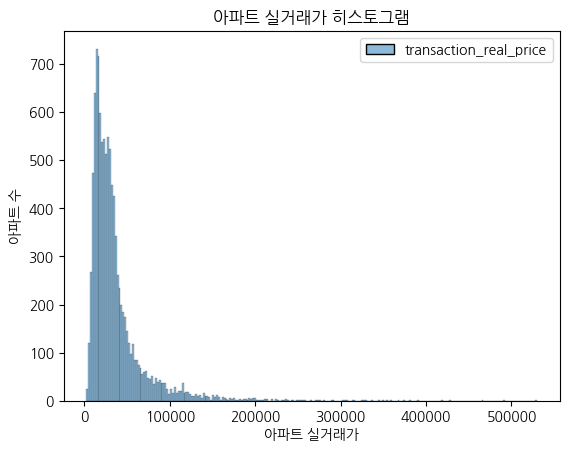

In [14]:
data = train[['apt', 'transaction_real_price']].groupby('apt').mean()

# Seaborn을 사용하여 히스토그램 그리기
sns.histplot(data, color='skyblue')

# 그래프에 제목과 축 레이블 추가
plt.title('아파트 실거래가 히스토그램')
plt.xlabel('아파트 실거래가')
plt.ylabel('아파트 수')

# 그래프 표시
plt.show()

### 8. exclusive_use_area 컬럼 탐색 (1)

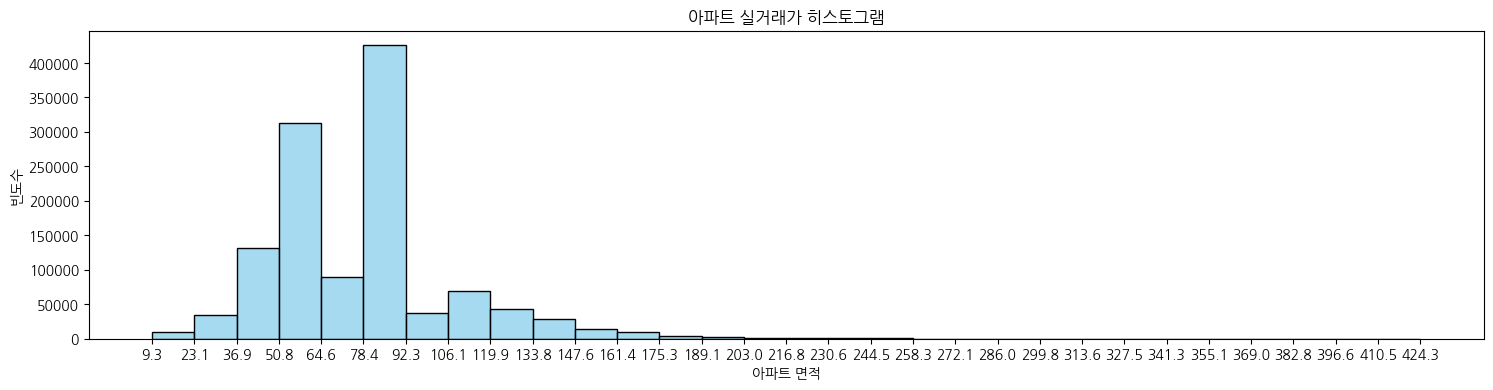

In [32]:
data = train['exclusive_use_area']

num_bins = 30  # 구간의 개수

plt.figure(figsize=(18, 4))
sns.histplot(data, color='skyblue', bins=num_bins)

plt.title('아파트 실거래가 히스토그램')
plt.xlabel('아파트 면적')
plt.ylabel('빈도수')

x_ticks = [min(data) + i * (max(data) - min(data)) / num_bins for i in range(num_bins + 1)]
plt.xticks(x_ticks)

plt.show()

In [36]:
train[train['exclusive_use_area']==424.32]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_full_d,transaction_day
963079,563870,12633,서울특별시,도곡동,193-1,힐데스하임빌라,도곡동 193-1 힐데스하임빌라,424.32,1998,201604,2016-04-11,10,498000,201604,11


In [42]:
train['exclusive_use_area'].sort_values()

1158697      9.26
9475         9.26
868992      11.66
868996      11.66
869000      11.66
            ...  
882791     317.36
125507     317.36
807058     317.36
507026     325.39
963079     424.32
Name: exclusive_use_area, Length: 1216553, dtype: float64

In [44]:
train[train['exclusive_use_area']==317.36]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_full_d,transaction_day
125507,13344,9643,서울특별시,이촌동,302-69,정우,이촌동 302-69 정우,317.36,1972,200904,2009-04-01,3,130000,200904,1
807058,19731,9643,서울특별시,이촌동,302-69,정우,이촌동 302-69 정우,317.36,1972,201504,2015-04-11,2,85000,201504,11
882791,20673,9643,서울특별시,이촌동,302-69,정우,이촌동 302-69 정우,317.36,1972,201509,2015-09-11,7,118000,201509,11


### 9. exclusive_use_area 컬럼 탐색 (2)

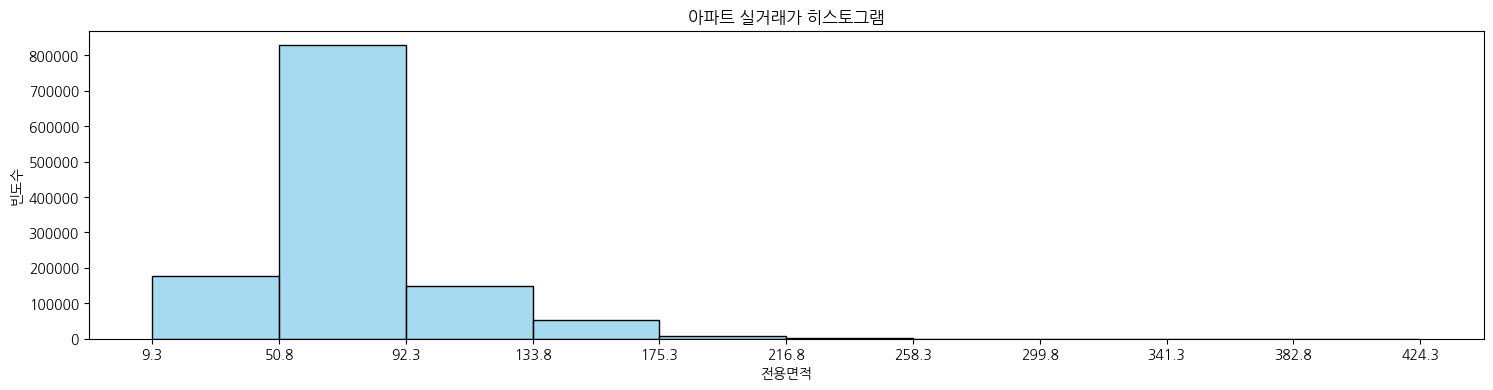

In [17]:
data = train['exclusive_use_area']

num_bins = 10  # 구간의 개수

plt.figure(figsize=(18, 4))
sns.histplot(data, color='skyblue', bins=num_bins)

plt.title('아파트 실거래가 히스토그램')
plt.xlabel('전용면적')
plt.ylabel('빈도수')

x_ticks = [min(data) + i * (max(data) - min(data)) / num_bins for i in range(num_bins + 1)]
plt.xticks(x_ticks)

plt.show()

### 10. year_of_completion 컬럼 탐색

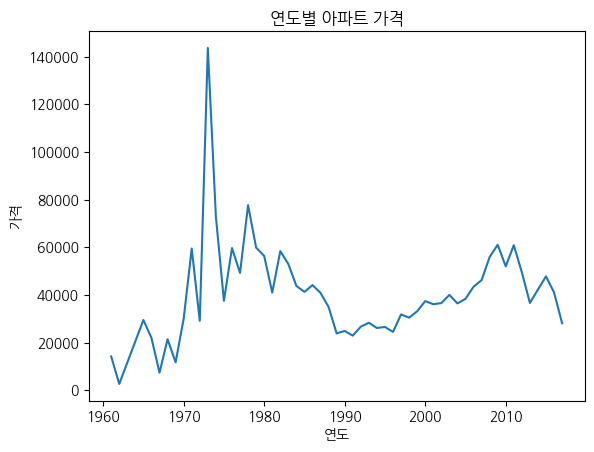

In [16]:
train_yearly = train.groupby(train['year_of_completion'])['transaction_real_price'].mean()

plt.plot(train_yearly.index, train_yearly.values)
plt.xlabel('연도')
plt.ylabel('가격')
plt.title('연도별 아파트 가격')
plt.show()

### 11. 날짜 데이터 전처리

In [21]:
def preprocess_tran_date(x):
    return x.split('~')[0]

# 'transaction_date' 열을 사용하여 시작 날짜 추출
train['transaction_day'] = train['transaction_date'].apply(preprocess_tran_date)
# 'transaction_year_month'와 추출한 'transaction_day'를 결합하여 날짜 생성
train['transaction_date'] = train['transaction_year_month'].astype(str) + train['transaction_day']
# 문자열을 날짜 객체로 변환
train['transaction_date'] = pd.to_datetime(train['transaction_date'], format='%Y%m%d')
# 날짜별로 정렬
train = train.sort_values('transaction_date').reset_index(drop=True)


### 12. 날짜별 타겟 데이터 시각화

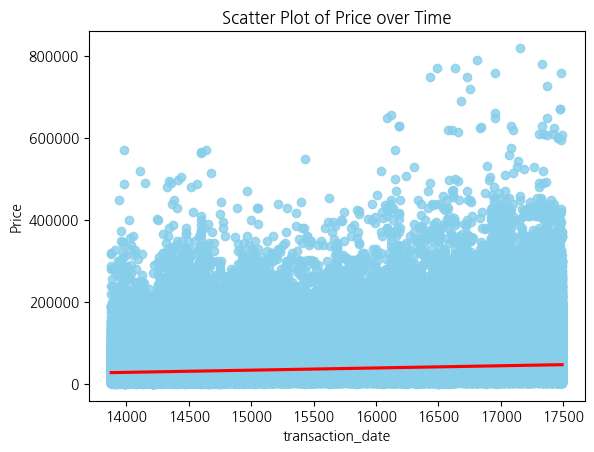

In [22]:
import matplotlib.dates as mdates

# Scatter Plot 그리기
sns.regplot(
    x=train['transaction_date'].map(mdates.date2num),
    y=train['transaction_real_price'],
    scatter_kws={'color': 'skyblue'},
    line_kws={'color': 'red'}
)

# x축과 y축 레이블 설정
plt.xlabel('transaction_date')
plt.ylabel('Price')

# 그래프 제목 설정
plt.title('Scatter Plot of Price over Time')

# 그래프 보여주기
plt.show()

- 그사세 에 해당하는 집들은 일반적인 아파트 값의 경향을 파악하는데 bias 를 일으킬 수 있으므로 그룹을 2개로 나누어서 진행할 필요가 있음.

### 13. floor 데이터 탐색

In [31]:
print('1층 이하: ', train[(train['floor'] < 2) & (train['dong'] == '한남동') & (train['exclusive_use_area'] > 60)]['transaction_real_price'].mean())
print('2층 이상: ', train[(train['floor'] >= 2) & (train['dong'] == '한남동') & (train['exclusive_use_area'] > 60)]['transaction_real_price'].mean())

1층 이하:  230841.99206349207
2층 이상:  149436.86437440306
